In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.colors as mcolors

from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
# 대용량 데이터 불러오기 # 약 3초 소요

from pyarrow import csv

import time
start = time.time() 

df = csv.read_csv('C:/Users/Soyoung Han/Dropbox/미세먼지건강영향평가/p3 분석용 파일/p3_merge_final_2.csv').to_pandas()

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 2.878567695617676


In [4]:
# 계절별, 날짜별, 요일별 pm2.5 평균

df_id = df[df["PID"] == "004-003"].groupby(['season', 'date', 'weekday'])['corneph'].agg('mean').reset_index()
df_id.head()

,season,date,weekday,corneph
0,Fall,2021-11-26,금요일,12.287290
1,Fall,2021-11-27,토요일,78.180280
2,Fall,2021-11-28,일요일,153.413740
3,Fall,2021-11-29,월요일,59.855689
4,Fall,2021-11-30,화요일,313.447231


In [58]:
# 수요일, 목요일 제외
df_id = df_id[~df_id['weekday'].isin(['수요일', '목요일'])]

In [59]:
df_pivot = pd.pivot(df_id, index = ['season'], columns = 'weekday', values = 'corneph').reset_index()
df_pivot

weekday,season,금요일,월요일,일요일,토요일,화요일
0,Fall,12.287290,59.855689,153.413740,78.180280,313.447231
1,Spring,7.892161,29.370114,17.269618,14.156499,9.720066
2,Summer,13.115059,17.734647,19.060577,18.288764,NaN
3,Winter,5.030397,4.183417,2.908910,4.890571,3.239015


In [60]:
def function(x):
    if x == "Spring":
        return "봄"
    elif x == "Summer":
        return "여름"
    elif x == "Fall":
        return "가을"
    else:
        return "겨울"

df_pivot['season']=df_pivot["season"].apply(function)

In [61]:
df_pivot.columns = ['season', '금요일', '토요일','일요일','월요일', '화요일' ]
df_pivot

,season,금요일,토요일,일요일,월요일,화요일
0,가을,12.287290,59.855689,153.413740,78.180280,313.447231
1,봄,7.892161,29.370114,17.269618,14.156499,9.720066
2,여름,13.115059,17.734647,19.060577,18.288764,NaN
3,겨울,5.030397,4.183417,2.908910,4.890571,3.239015


In [62]:
df_pivot[['금요일', '토요일','일요일','월요일', '화요일']]

,금요일,토요일,일요일,월요일,화요일
0,12.287290,59.855689,153.413740,78.180280,313.447231
1,7.892161,29.370114,17.269618,14.156499,9.720066
2,13.115059,17.734647,19.060577,18.288764,NaN
3,5.030397,4.183417,2.908910,4.890571,3.239015


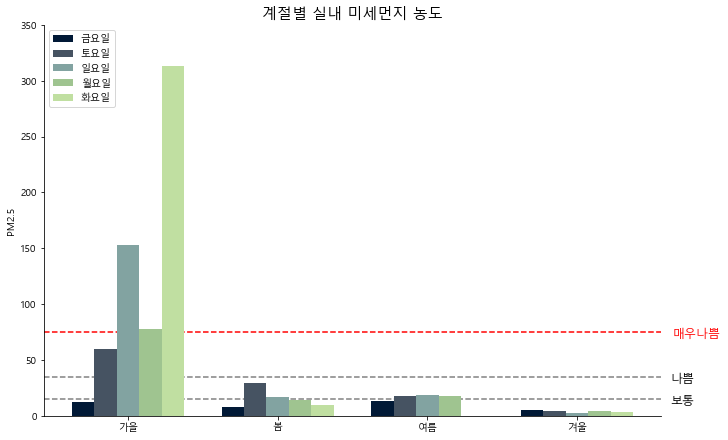

In [63]:
import matplotlib.colors as mcolors

# Define custom colors for the colormap
custom_colors = ['#011936', '#465362', '#82A3A1', '#9FC490', '#C0DFA1']

season = ['가을', '봄', '여름', '겨울']
weekday_corneph = df_pivot[['금요일', '토요일','일요일','월요일', '화요일']]
x = np.arange(len(season))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(layout='constrained',figsize=(10,6))

for i, (name, values) in enumerate(weekday_corneph.items()):
    rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors[i])

    
ax.spines[['right', 'top']].set_visible(False)
ax.axhline(y=15, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=35, zorder=0, color='grey', ls='--', lw=1.5)
ax.axhline(y=75, zorder=0, color='red', ls='--', lw=1.5)

ax.text(x=4, y=10, s='보통', ha='center', fontsize=12)
ax.text(x=4, y=30, s='나쁨', ha='center', fontsize=12)
ax.text(x=4.1, y=70, s='매우나쁨', ha='center', fontsize=12, color = 'red')
# bbox=dict(facecolor='white', edgecolor='grey', ls='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PM2.5')
ax.set_title('계절별 실내 미세먼지 농도', fontsize = 15)
ax.set_xticks(x + width*2, season)
ax.legend(loc='upper left')
ax.set_ylim(0, 350)
# ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

# plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
plt.show()


In [4]:
df.head()

,FilterID,PID,UPSN,Platfm,Time___Time_,rawneph,corneph,Temp,RH,date,month,year,season,day,time,hour,weekday
0,KSN1668,004-002,MTL1010037,I,1:48:10,8.377,7.815731,26.10,41.7,2021-11-16,11.0,2021.0,Fall,16.0,01:48:10,1,화요일
1,KSN1668,004-002,MTL1010037,I,1:52:10,8.412,7.848386,26.10,40.7,2021-11-16,11.0,2021.0,Fall,16.0,01:52:10,1,화요일
2,KSN1668,004-002,MTL1010037,I,1:47:30,8.398,7.835324,25.95,41.1,2021-11-16,11.0,2021.0,Fall,16.0,01:47:30,1,화요일
3,KSN1668,004-002,MTL1010037,I,1:51:30,2.804,2.616129,26.00,40.7,2021-11-16,11.0,2021.0,Fall,16.0,01:51:30,1,화요일
4,KSN1668,004-002,MTL1010037,I,21:16:30,5.579,5.205200,26.20,41.9,2021-11-15,11.0,2021.0,Fall,15.0,21:16:30,21,월요일


In [12]:
# 시간에 따른 미세먼지 농도 line plot (계절별)


df_hour = df[df['PID'] == "004-003"].groupby(['season', 'hour'])['corneph'].agg('mean').reset_index()
df_hour

,season,hour,corneph
0,Fall,0,130.367253
1,Fall,1,160.344400
2,Fall,2,190.030532
3,Fall,3,219.240574
4,Fall,4,247.817556
...,...,...,...
91,Winter,19,3.544666
92,Winter,20,3.613446
93,Winter,21,3.685414
94,Winter,22,2.892479


In [14]:
df_hour.loc[df_hour['season'] == 'Fall']['corneph']

0     130.367253
1     160.344400
2     190.030532
3     219.240574
4     247.817556
5     265.327483
6     253.026614
7      94.616253
8     125.592250
9      83.001900
10     67.264757
11     64.442398
12     60.266303
13     38.645334
14     40.078448
15     35.863517
16     32.712439
17     25.434998
18     21.725295
19     19.691360
20     26.499824
21     38.833988
22     61.529170
23     94.927995
Name: corneph, dtype: float64

In [18]:
df_hour['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

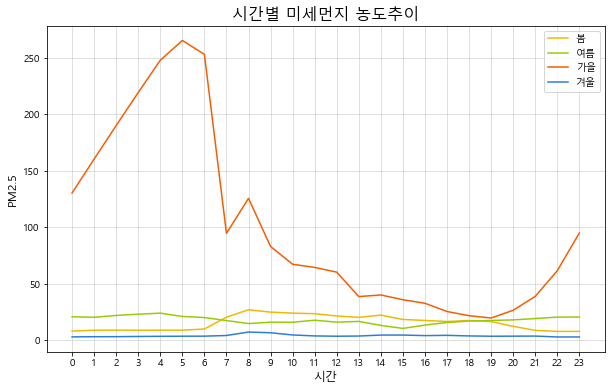

In [34]:
color = ['#99C24D', '#048BA8', '#F18F01', '#2E4057']
color2 = ['#EEB902', '#97CC04', '#F45D01', '#2D7DD2']


fig, ax = plt.subplots(figsize=(10,6))
#ax.spines[['right', 'top']].set_visible(False)
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == 'Spring']['corneph'], color = color2[0], label = '봄')
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == 'Summer']['corneph'], color = color2[1], label = '여름')
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == 'Fall']['corneph'], color = color2[2], label = '가을')
ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == 'Winter']['corneph'], color = color2[3], label = '겨울')

ax.set_xlabel('시간', fontsize=12)
ax.set_ylabel('PM2.5', fontsize=12)
ax.set_title('시간별 미세먼지 농도추이', fontsize=16)
ax.legend(loc = 'upper right')

plt.xticks(np.arange(0,24))
plt.grid(True, alpha = 0.5)
plt.show()

## 실내, 실외 비교

### 1. 전체 실외 평균과 개별 실외의 추이가 비슷한지 비교

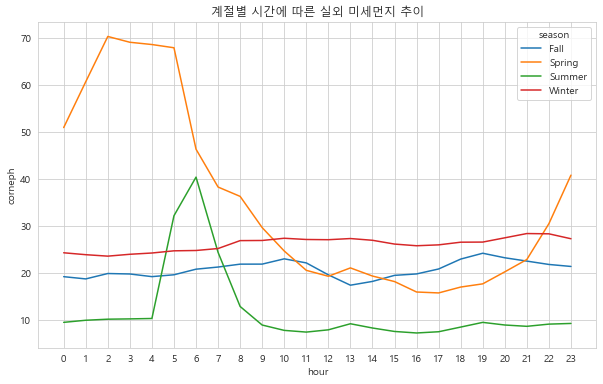

In [49]:
# 전체 실외 데이터 계절별 1시간 단위 평균값 구한 후 line plot 그리기

df_out = df[df['Platfm'] == "O"].groupby(['season','hour'])['corneph'].agg('mean').reset_index()

fig, ax = plt.subplots(figsize= (10,6))

g = sns.lineplot(x='hour', y= 'corneph', hue='season', data=df_out)
sns.set_style("whitegrid")
g.set_xticks(range(0,24))

plt.title("계절별 시간에 따른 실외 미세먼지 추이")

plt.show()

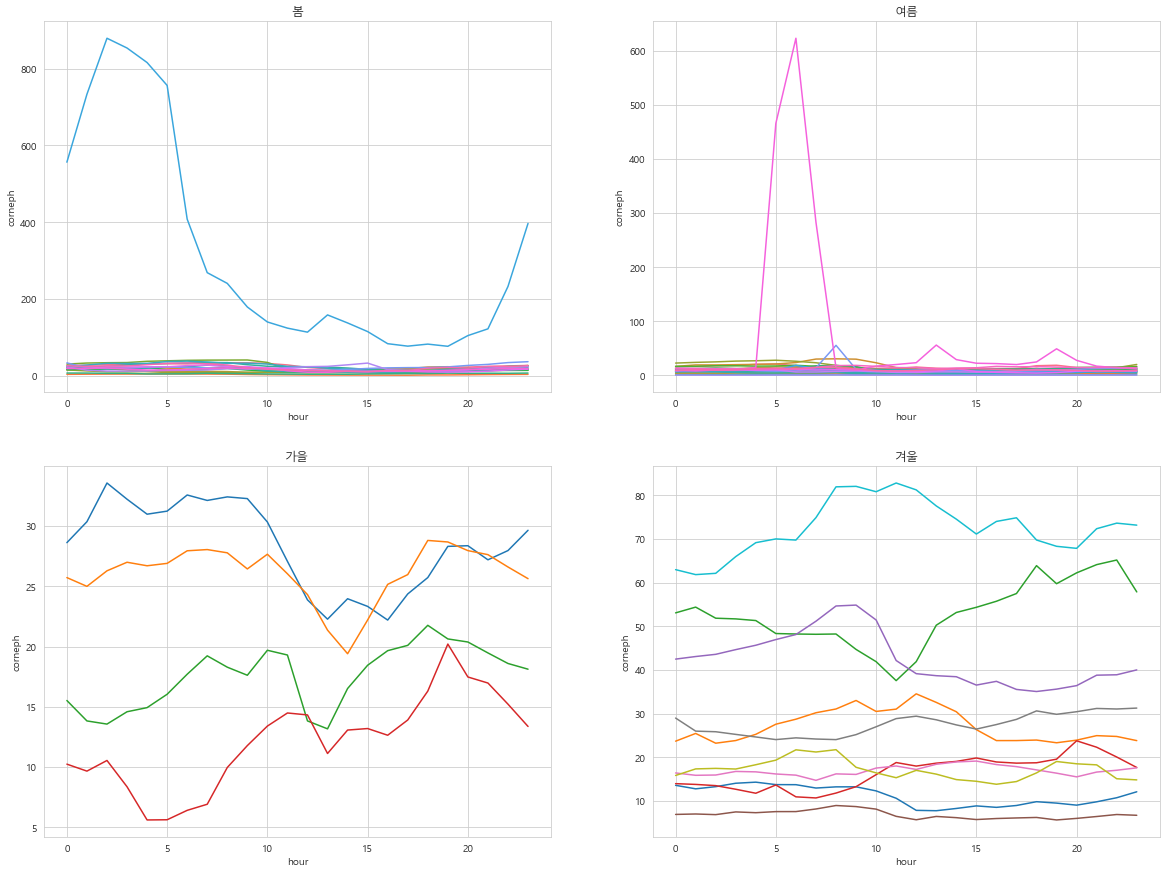

In [60]:
df_out_pid = df[df['Platfm'] == "O"].groupby(['season','PID','hour'])['corneph'].agg('mean').reset_index()

spring = df_out_pid.loc[df_out_pid['season'] == "Spring"]
summer = df_out_pid.loc[df_out_pid['season'] == "Summer"]
fall = df_out_pid.loc[df_out_pid['season'] == "Fall"]
winter = df_out_pid.loc[df_out_pid['season'] == "Winter"]

fig, ax = plt.subplots(figsize = (20, 15), nrows = 2,ncols = 2)
g1 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = spring, ax = ax[0,0], legend = False)
g1.set_title("봄")
g2 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = summer, ax = ax[0,1], legend = False)
g2.set_title("여름")
g3 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = fall, ax = ax[1,0], legend = False)
g3.set_title("가을")
g4 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = winter, ax = ax[1,1], legend = False)
g4.set_title("겨울")

plt.show()

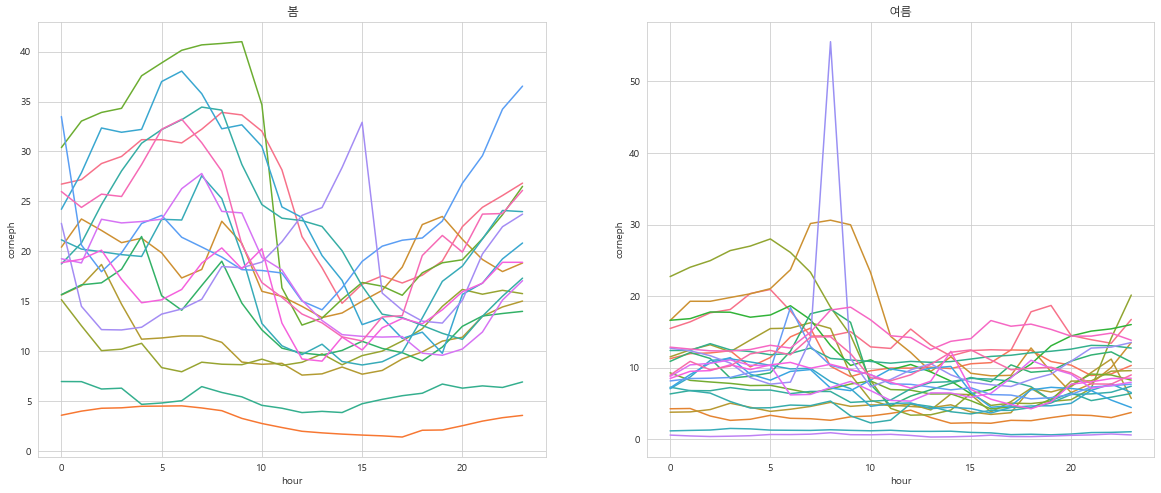

In [76]:
# 봄, 여름 아웃라이어 제거 후

fig, ax = plt.subplots(figsize=(20, 8), ncols = 2)

p1 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = spring.loc[~(spring['PID'] == '006-004')], legend = False, ax = ax[0])
p1.set_title("봄", fontsize = 12)

p2 = sns.lineplot(x = 'hour', y = 'corneph', hue = 'PID', data = summer.loc[~(summer['PID'] == '032-008')], legend = False, ax = ax[1])
p2.set_title("여름", fontsize = 12)

plt.show()

### 2. 실외 데이터가 존재하는 ID 실내 실외 비교 plot 그리기

In [67]:
# PID 004-004 I와 O 둘다 존재 하는지 확인
df.loc[df["PID"] == "004-004"]['Platfm'].unique()

array(['O', 'I'], dtype=object)

In [68]:
# 계절별, platfm별  pm2.5 평균

df_id = df[df["PID"] == "004-004"]
df_grouped = df_id.groupby(['season', 'Platfm'])['corneph'].mean().reset_index()
df_grouped

,season,Platfm,corneph
0,Fall,I,5.606228
1,Fall,O,27.971650
2,Spring,I,6.713112
3,Spring,O,11.334464
4,Summer,I,20.823595
5,Winter,I,10.597319
6,Winter,O,16.560718


In [69]:
def function(x):
    if x == "Spring":
        return "봄"
    elif x == "Summer":
        return "여름"
    elif x == "Fall":
        return "가을"
    else:
        return "겨울"

df_grouped['season']=df_grouped["season"].apply(function)

In [70]:
df_pivot = pd.pivot(df_grouped, index = ['season'], columns = 'Platfm', values = 'corneph').reset_index()
df_pivot = df_pivot.rename(columns = {"I": "실내", "O": "실외"})

In [71]:
df_pivot

Platfm,season,실내,실외
0,가을,5.606228,27.971650
1,겨울,10.597319,16.560718
2,봄,6.713112,11.334464
3,여름,20.823595,NaN


In [72]:
df_pivot[['실내', '실외']]

Platfm,실내,실외
0,5.606228,27.971650
1,10.597319,16.560718
2,6.713112,11.334464
3,20.823595,NaN


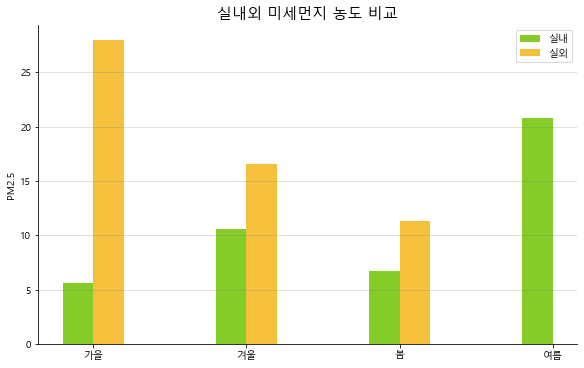

In [84]:
import matplotlib.colors as mcolors

# Define custom colors for the colormap
custom_colors = ['#85CC28', '#F5C13D']

season = ['가을', '겨울', '봄', '여름']
platfm_corneph = df_pivot[['실내', '실외']]
x = np.arange(len(season))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(layout='constrained',figsize=(8,5))

for i, (name, values) in enumerate(platfm_corneph.items()):
    rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors[i])

    
ax.spines[['right', 'top']].set_visible(False)
# bbox=dict(facecolor='white', edgecolor='grey', ls='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PM2.5')
ax.set_title('실내외 미세먼지 농도 비교', fontsize = 15)
ax.set_xticks(x + width*0.5, season)
ax.legend(loc='upper right')
ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

# plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
plt.show()

### 3. 요일별, 시간별, 실내외 그래프 함수로 만들기

In [8]:
# 계절 변수 한글로 바꾸기

def function(x):
    if x == "Spring":
        return "봄"
    elif x == "Summer":
        return "여름"
    elif x == "Fall":
        return "가을"
    else:
        return "겨울"

df['season']=df["season"].apply(function)

In [75]:
# 요일별 계절별 실내 미세먼지 농도

def weekday_plot(PID):
    # ID와 실내 데이터 추출
    df_id = df[(df["PID"] == PID) & (df["Platfm"] == "I")]

    # 계절,요일별 평균
    df_id = df_id.groupby(['season', 'date', 'weekday'])['corneph'].agg('mean').reset_index()

    # 수요일, 목요일 제외
    df_id = df_id[~df_id['weekday'].isin(['수요일', '목요일'])]

    # pivot 형태로 만들기
    df_pivot = pd.pivot(df_id, index = ['season'], columns = 'weekday', values = 'corneph').reset_index()

    # 컬럼 순서 조정
    df_pivot.columns = ['season', '금요일', '토요일', '일요일', '월요일', '화요일']
    
    # Define custom colors for the colormap
    custom_colors = ['#233d4d', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a']
    custom_colors2 = ['#413c58', '#a3c4bc', '#bfd7b5', '#e7efc5', '#f2dda4']

    season = df_pivot['season'].tolist()
    weekday_corneph = df_pivot[['금요일', '토요일','일요일','월요일', '화요일']]
    x = np.arange(len(season))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(layout='constrained',figsize=(10,6))

    for i, (name, values) in enumerate(weekday_corneph.items()):
        rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors[i])


    ax.spines[['right', 'top']].set_visible(False)
    ax.axhline(y=15, zorder=0, color='grey', ls='--', lw=1.5)
    ax.axhline(y=35, zorder=0, color='grey', ls='--', lw=1.5)
    ax.axhline(y=75, zorder=0, color='red', ls='--', lw=1.5)

    ax.text(x=4, y=14, s='보통', ha='center', fontsize=12)
    ax.text(x=4, y=34, s='나쁨', ha='center', fontsize=12)
    ax.text(x=4.1, y=74, s='매우나쁨', ha='center', fontsize=12, color = 'red')
    # bbox=dict(facecolor='white', edgecolor='grey', ls='--')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('미세먼지', fontsize = 13)
    ax.set_title('계절별 실내 미세먼지 농도', fontsize = 15, fontweight = "bold")
    ax.set_xticks(x + width*2, season)
    ax.legend(loc=(0.15,-0.15), ncol = 5, fontsize = 13)
    ax.tick_params(labelsize=13)
    # ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)

    # plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
    plt.show()

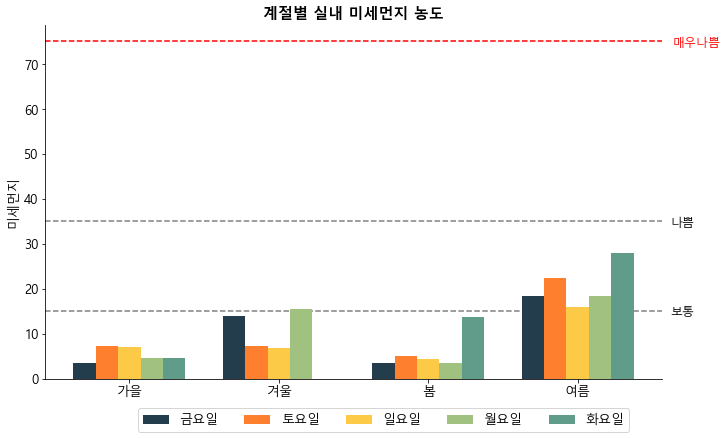

In [76]:
weekday_plot("004-004")

In [95]:
# 시간에 따른 미세먼지 농도 line plot (계절별)

def hour_plot(PID):
    df_hour = df[df['PID'] == PID].groupby(['season', 'hour'])['corneph'].agg('mean').reset_index()
    # color = ['#99C24D', '#048BA8', '#F18F01', '#2E4057']
    # color2 = ['#EEB902', '#97CC04', '#F45D01', '#2D7DD2']


    fig, ax = plt.subplots(figsize=(10,6))
    #ax.spines[['right', 'top']].set_visible(False)
    ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == '봄']['corneph'], color = '#ecc30b', label = '봄')
    ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == '여름']['corneph'], color = '#08a045', label = '여름')
    ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == '가을']['corneph'], color = '#db222a', label = '가을')
    ax.plot(df_hour['hour'].unique(), df_hour.loc[df_hour['season'] == '겨울']['corneph'], color = '#0582ca', label = '겨울')

    # ax.set_xlabel('시간', fontsize=13)
    ax.set_ylabel('미세먼지', fontsize=13)
    ax.set_title('시간별 미세먼지 농도추이', fontsize=15, fontweight = "bold")
    ax.legend(loc=(0.2,-0.2), ncol = 4, fontsize = 13)
    ax.set_xticks(np.arange(0,24,4))
    ax.set_xticklabels(['오전 12시', '오전 4시', '오전 8시', '오후 12시', '오후 4시', '오후 8시'])
    ax.tick_params(labelsize=13)

    plt.grid(True, alpha = 0.5)
    plt.show()

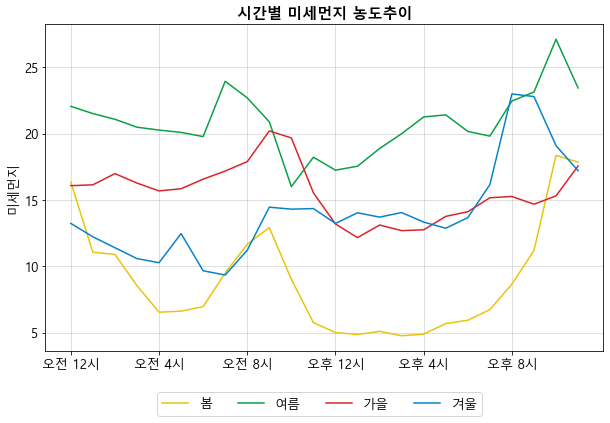

In [96]:
hour_plot("004-004")

In [115]:
# 계절별, platfm별  pm2.5 평균

def platfm_plot(PID):
    
    # Dataframe 만들기
    df_id = df[df["PID"] == PID]
    df_grouped = df_id.groupby(['season', 'Platfm'])['corneph'].mean().reset_index()

    df_pivot = pd.pivot(df_grouped, index = ['season'], columns = 'Platfm', values = 'corneph').reset_index()
    df_pivot = df_pivot.rename(columns = {"I": "실내", "O": "실외"})

    # Define custom colors for the colormap
    custom_colors = ['#85CC28', '#F5C13D']

    season = df_pivot['season'].tolist()
    platfm_corneph = df_pivot[['실내', '실외']]
    x = np.arange(len(season))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(layout='constrained',figsize=(8,5))

    for i, (name, values) in enumerate(platfm_corneph.items()):
        rects = ax.bar(x + i*width, values, width, label= name, color=custom_colors[i])


    ax.spines[['right', 'top']].set_visible(False)
    # bbox=dict(facecolor='white', edgecolor='grey', ls='--')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('미세먼지', fontsize=13)
    ax.set_title('실내외 미세먼지 농도 비교', fontsize = 15, fontweight = "bold")
    ax.set_xticks(x + width*0.5, season)
    ax.legend(loc=(0.35,-0.2), ncol = 2, fontsize = 13)
    ax.grid(True, axis = 'y', color='gray', linewidth=0.5, alpha = 0.5)
    ax.tick_params(labelsize=13)

    # plt.savefig('seasonal_with_barlabel.png', bbox_inches = 'tight', facecolor='#ffffff')
    plt.show()

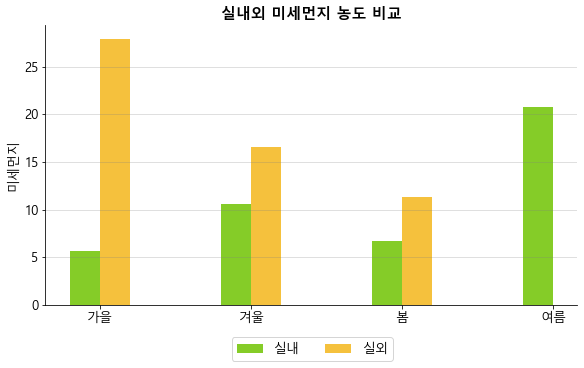

In [116]:
platfm_plot("004-004")